In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
df.describe(include = 'object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [7]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
df.tail(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4259,4260,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
4260,4261,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4262,4263,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [9]:
#check null values
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [10]:
for column in df.columns :
    print(f"{column}:{df.columns.unique()}")

loan_id:Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
 no_of_dependents:Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
 education:Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
 self_employed:Index(['loan_id', ' no_of_dependents', ' education', ' self_

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns = df.columns.str.strip()

In [13]:
df["all_assets_values"] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value']+ df['bank_asset_value']

In [14]:
df = df.drop(["residential_assets_value",'commercial_assets_value','luxury_assets_value','bank_asset_value', 'loan_id'], axis = 1)

In [15]:
numerical =df.select_dtypes(include = 'int64')
numerical

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,all_assets_values
0,2,9600000,29900000,12,778,50700000
1,0,4100000,12200000,8,417,17000000
2,3,9100000,29700000,20,506,57700000
3,3,8200000,30700000,8,467,52700000
4,5,9800000,24200000,20,382,55000000
...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,7400000
4265,0,3300000,11300000,20,559,20000000
4266,2,6500000,23900000,18,457,39000000
4267,1,4100000,12800000,8,780,28800000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   no_of_dependents   4269 non-null   int64 
 1   education          4269 non-null   object
 2   self_employed      4269 non-null   object
 3   income_annum       4269 non-null   int64 
 4   loan_amount        4269 non-null   int64 
 5   loan_term          4269 non-null   int64 
 6   cibil_score        4269 non-null   int64 
 7   loan_status        4269 non-null   object
 8   all_assets_values  4269 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 300.3+ KB


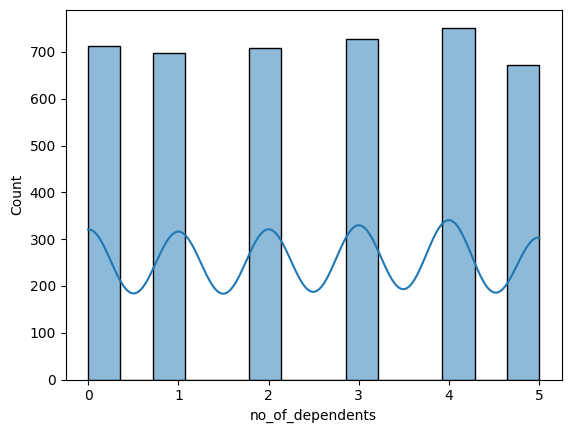

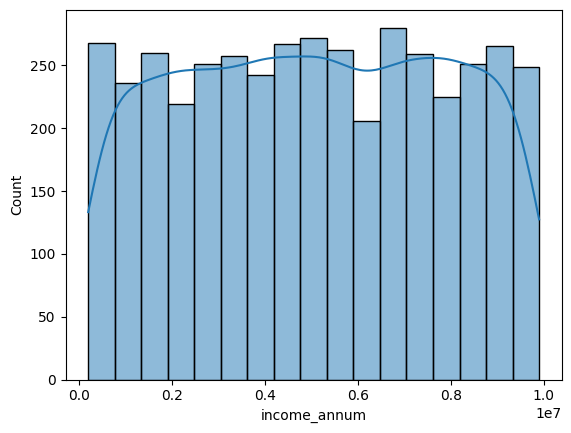

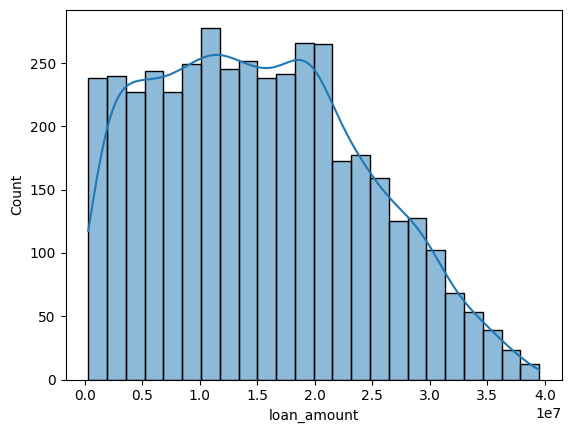

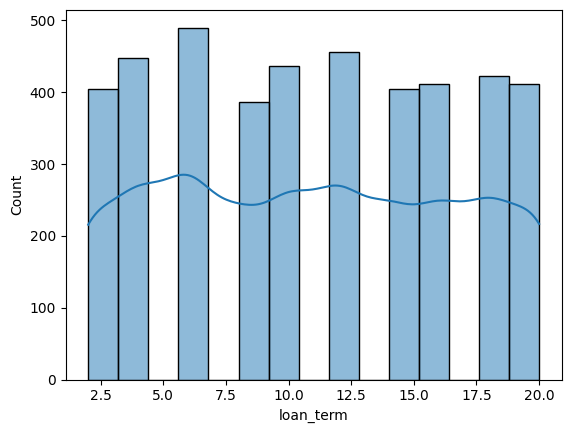

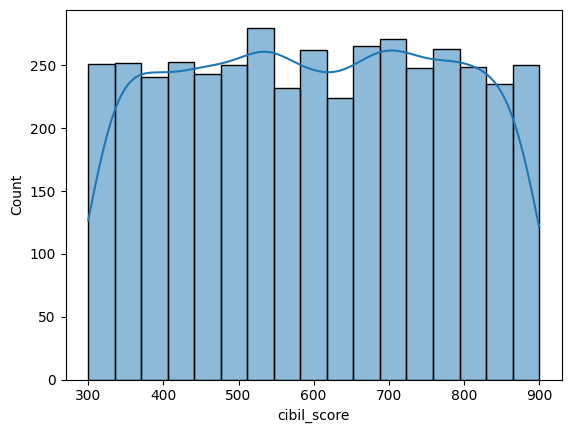

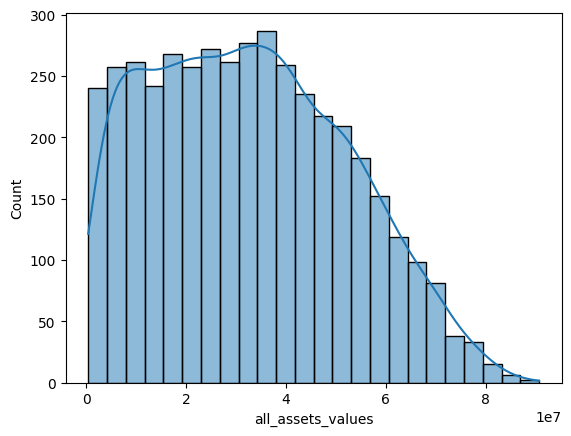

In [17]:
for i in numerical.columns :
    sns.histplot(data = df, x = i, kde  = True)
    plt.show()

In [18]:
categorical = df.select_dtypes(include = 'object')

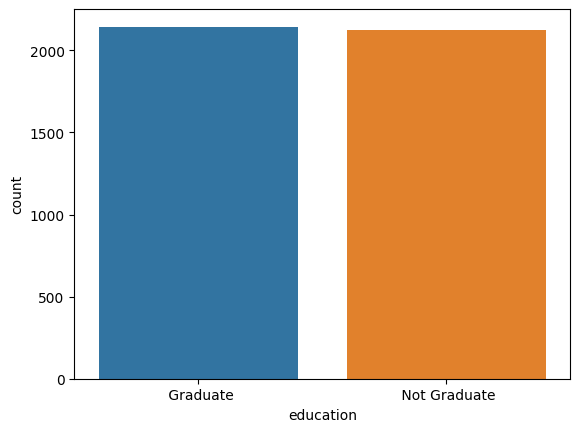

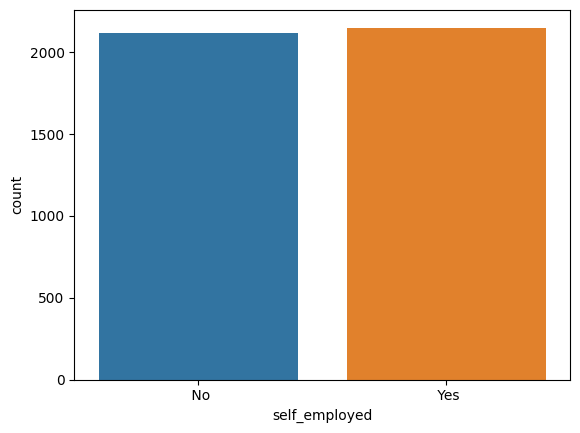

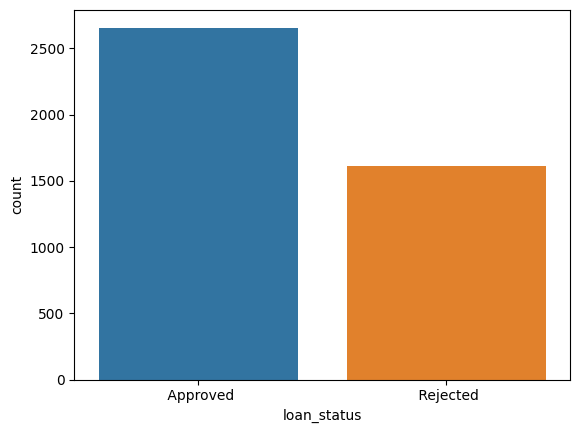

In [19]:
for i in categorical.columns:
    sns.countplot(data = df, x = i )
    plt.show()

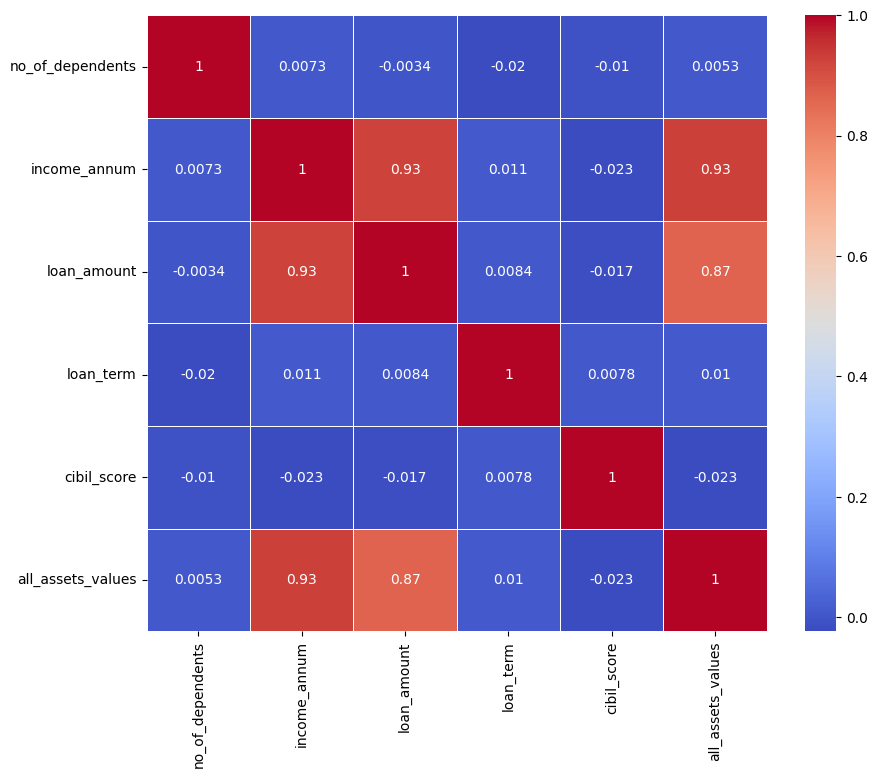

In [20]:
#linearty
plt.figure(figsize= (10,8))
sns.heatmap(numerical.corr(),cmap = 'coolwarm', annot = True, linewidth  = 0.5)
plt.show()

In [21]:
#high correlated features --- drop one to avoid colinearity
df = df.drop('income_annum', axis = 1)

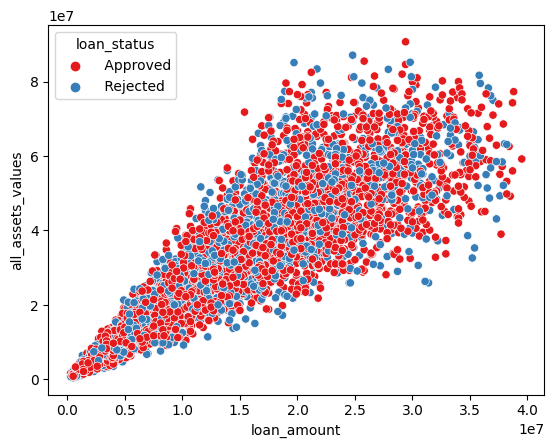

In [22]:
sns.scatterplot(x = df['loan_amount'], y = df['all_assets_values'], hue = df['loan_status'], palette = 'Set1')
plt.show()

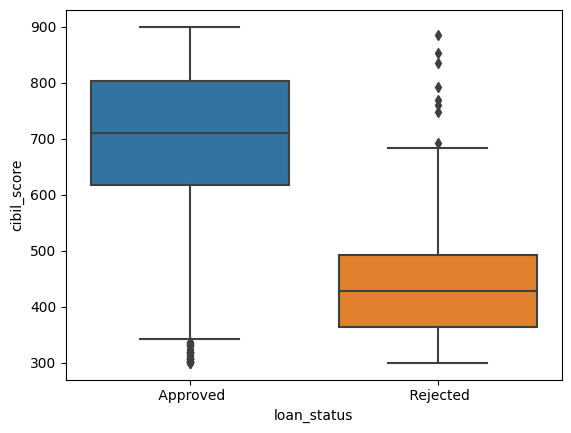

In [23]:
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.show()

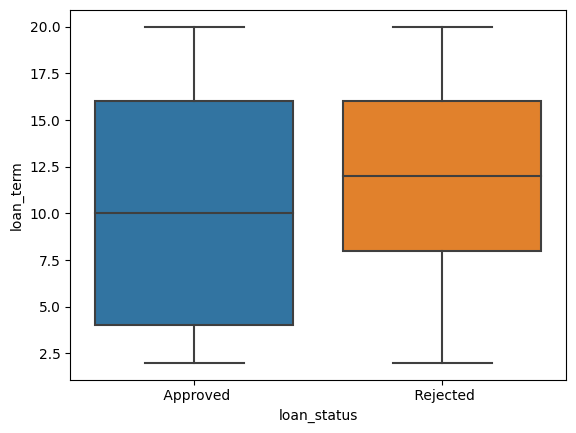

In [24]:
sns.boxplot(x='loan_status', y='loan_term', data=df)
plt.show()

In [25]:
df['loan_status'].value_counts(normalize = True) * 100

loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64

In [26]:
df = pd.get_dummies(df,columns = categorical.columns, drop_first = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   no_of_dependents         4269 non-null   int64
 1   loan_amount              4269 non-null   int64
 2   loan_term                4269 non-null   int64
 3   cibil_score              4269 non-null   int64
 4   all_assets_values        4269 non-null   int64
 5   education_ Not Graduate  4269 non-null   bool 
 6   self_employed_ Yes       4269 non-null   bool 
 7   loan_status_ Rejected    4269 non-null   bool 
dtypes: bool(3), int64(5)
memory usage: 179.4 KB


In [28]:
df['loan_status_approved'] = ~df['loan_status_ Rejected']
df =df.drop('loan_status_ Rejected', axis = 1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   no_of_dependents         4269 non-null   int64
 1   loan_amount              4269 non-null   int64
 2   loan_term                4269 non-null   int64
 3   cibil_score              4269 non-null   int64
 4   all_assets_values        4269 non-null   int64
 5   education_ Not Graduate  4269 non-null   bool 
 6   self_employed_ Yes       4269 non-null   bool 
 7   loan_status_approved     4269 non-null   bool 
dtypes: bool(3), int64(5)
memory usage: 179.4 KB


In [30]:
df.head()

,no_of_dependents,loan_amount,loan_term,cibil_score,all_assets_values,education_ Not Graduate,self_employed_ Yes,loan_status_approved
0,2,29900000,12,778,50700000,False,False,True
1,0,12200000,8,417,17000000,True,True,False
2,3,29700000,20,506,57700000,False,False,False
3,3,30700000,8,467,52700000,False,False,False
4,5,24200000,20,382,55000000,True,True,False


In [31]:
X = df.drop('loan_status_approved', axis = 1).copy()
y = df['loan_status_approved']

In [32]:
X

,no_of_dependents,loan_amount,loan_term,cibil_score,all_assets_values,education_ Not Graduate,self_employed_ Yes
0,2,29900000,12,778,50700000,False,False
1,0,12200000,8,417,17000000,True,True
2,3,29700000,20,506,57700000,False,False
3,3,30700000,8,467,52700000,False,False
4,5,24200000,20,382,55000000,True,True
...,...,...,...,...,...,...,...
4264,5,2300000,12,317,7400000,False,True
4265,0,11300000,20,559,20000000,True,True
4266,2,23900000,18,457,39000000,True,False
4267,1,12800000,8,780,28800000,True,False


In [33]:
x_train, x_test, y_train, y_test  = train_test_split(X,y,test_size = .2, random_state = 102)

In [34]:
ss = StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [35]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [36]:
y_predict=lr.predict(x_test_scaled)

In [37]:
print(f"train score : {lr.score(x_train_scaled,y_train)}")
print(f"test score : {lr.score(x_test_scaled,y_test)}")

train score : 0.9165446559297218
test score : 0.9192037470725996


In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.90      0.89      0.90       331
        True       0.93      0.94      0.93       523

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



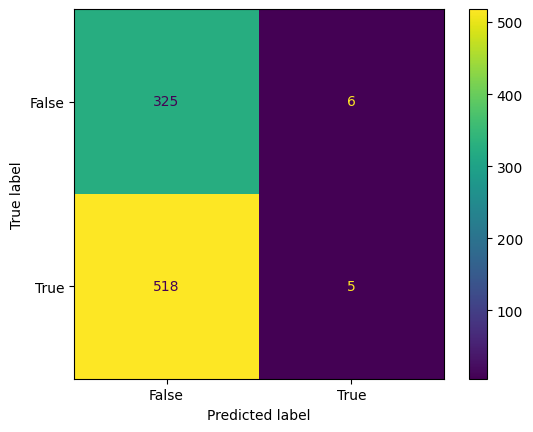

In [39]:
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)
plt.show()

In [44]:
dt = DecisionTreeClassifier(random_state= 42)

In [45]:
#hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}


In [48]:
gs = GridSearchCV(dt,param_grid, cv = 10)

In [49]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]})

In [63]:
print(f"best cross validation score : {gs.best_score_}")
print(f"the best parameters for the decision tree : {gs.best_params_}")

best cross validation score : 0.9733532266639229
the best parameters for the decision tree : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}


In [59]:
best_dt = gs.best_estimator_
y_predict_dt = best_dt.predict(x_test)

In [61]:
print(classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

       False       0.97      0.96      0.97       331
        True       0.98      0.98      0.98       523

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [66]:
print(confusion_matrix(y_test,y_predict_dt))

[[318  13]
 [ 10 513]]


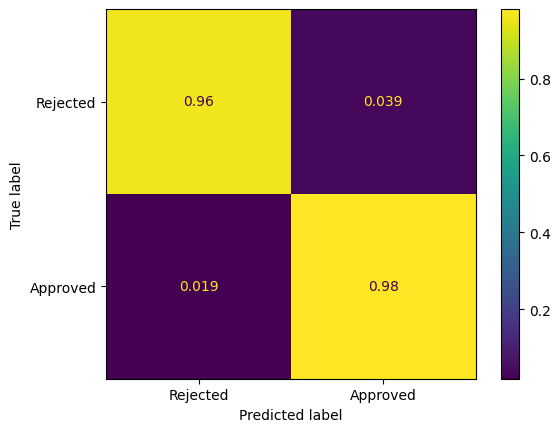

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_predict_dt,
                                       display_labels = ['Rejected','Approved'],
                                       normalize = 'true')
plt.show()